# Сборный проект (аналитика по играм)

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## План выполнения работ
#### [Шаг 1. Откройте файл с данными и изучите общую информацию ](#step1)
#### [Шаг 2. Подготовьте данные](#step2)
#### [Шаг 3. Проведите исследовательский анализ данных](#step3)
#### [Шаг 4. Составьте портрет пользователя каждого региона](#step4)
#### [Шаг 5. Проверьте гипотезы](#step5)
#### [Шаг 6. Общий вывод](#step6)




## <a id="step1">Шаг 1. Откройте файл с данными и изучите общую информацию </a>

### Импортируем библиотеки

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings 
import seaborn as sns
from scipy import stats as st
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', 500)

### Рассмотрим полученные данные

#### Прочитаем методом read_csv файл

In [155]:
#games_data = pd.read_csv('/Users/vladimrogulo/PycharmProjects/Praktikum4/games.csv')
games_data = pd.read_csv('/datasets/games.csv')

#####  Рассмотрим  games_data

In [156]:
print('\nРассмотрим общую информацию')
games_data.info()
print('\nРассмотрим первые 10 строк')
display(games_data.head(10))
print('\nРассмотрим описательную статистику нашего DataFrame')
games_data.describe()


Рассмотрим общую информацию
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

Рассмотрим первые 10 строк


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN



Рассмотрим описательную статистику нашего DataFrame


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [157]:
games_data.describe(include='object')

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


##### Описание  данных

`Name` — название игры

`Platform` — платформа

`Year_of_Release` — год выпуска

`Genre` — жанр игры

`NA_sales` — продажи в Северной Америке (миллионы долларов)

`EU_sales` — продажи в Европе (миллионы долларов)

`JP_sales` — продажи в Японии (миллионы долларов)

`Other_sales` — продажи в других странах (миллионы долларов)

`Critic_Score` — оценка критиков (максимум 100)

`User_Score` — оценка пользователей (максимум 10)

`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


### Вывод
Рассмотрев полученные данные, заметим, что имеются пропуски в столбцах  `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`.

Приведем назавание столбцов и данные в столбцах   `name`, `platform`, `genre` к нижнему регистру.

Требуется перевести столбец `Year_of_Release` к формату даты, а также `User_Score` к формату float

## <a id="step2">Шаг 2. Подготовьте данные </a>

### Приведем названия столбцов к нижнему регистру

In [158]:
games_data.columns = games_data.columns.str.lower()
display(games_data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Приведем столбцы к name, platform, genre к нижнему регистру

In [159]:
games_data['name'] = games_data['name'].str.lower()
games_data['platform'] = games_data['platform'].str.lower()
games_data['genre'] = games_data['genre'].str.lower()


#### Заполним дату релиза медианой, сгруппированной по наименованию и консолям 

In [160]:
display(games_data.loc[games_data['year_of_release'].isna()==True].head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [161]:
# Заполним медианой по названию
games_data['year_of_release']=games_data.groupby(['name'])['year_of_release'].apply(lambda x: x.fillna(x.median()))
games_data['year_of_release']=games_data.groupby(['platform'])['year_of_release'].apply(lambda x: x.fillna(x.median()))
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Преобразуем данные в нужные типы

In [162]:
#Приведем столбец year_of_release к формату даты
games_data['year_of_release'] = pd.to_datetime(games_data['year_of_release'], format='%Y')
games_data['year_of_release'] = games_data['year_of_release'].dt.year 
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


### Обработка пропусков

#### Рассмотрим пропуска в столбце name

In [163]:
display(games_data.loc[games_data['name'].isna() == True])
# Данные строки можно смело удалять, так как почти везде присутствую пропущенные значения 
games_data = games_data.drop(games_data.index[[659,14244]]).reset_index(drop = True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


#### Посмотрим, есть ли дубликаты 

In [164]:
print('Количество дубликатов:', games_data.duplicated().sum())
display(games_data.loc[games_data.duplicated(['name', 'platform'], keep = False)])

Количество дубликатов: 0


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,madden nfl 13,ps3,2012,sports,2.11,0.22,0.00,0.23,83.0,5.5,E
1189,need for speed: most wanted,x360,2012,racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1590,need for speed: most wanted,x360,2005,racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1744,sonic the hedgehog,ps3,2006,platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4126,sonic the hedgehog,ps3,2006,platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
5971,need for speed: most wanted,pc,2005,racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11714,need for speed: most wanted,pc,2012,racing,0.00,0.06,0.00,0.02,82.0,8.5,T
16228,madden nfl 13,ps3,2012,sports,0.00,0.01,0.00,0.00,83.0,5.5,E


In [165]:
#Сгруппируем по name и platform и просуммируем нужные нам столбцы
games_data = games_data.groupby(['name', 'platform'],as_index= False).agg({'year_of_release':'first', 'genre':'first', 'na_sales':'sum', 
                                                                           'eu_sales':'sum', 'jp_sales':'sum', 'other_sales':'sum', 
                                                                           'critic_score':'first', 'user_score':'first','rating':'first'}).reset_index(drop = True)
display(games_data.info())
# Ремейк NFS мы учитывать не будем 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16709 entries, 0 to 16708
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16709 non-null  object 
 1   platform         16709 non-null  object 
 2   year_of_release  16709 non-null  int64  
 3   genre            16709 non-null  object 
 4   na_sales         16709 non-null  float64
 5   eu_sales         16709 non-null  float64
 6   jp_sales         16709 non-null  float64
 7   other_sales      16709 non-null  float64
 8   critic_score     8133 non-null   float64
 9   user_score       10010 non-null  object 
 10  rating           9945 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


None

#### Посчитайте суммарные продажи во всех регионах

In [166]:
games_data['sum_sales'] = games_data['na_sales']+games_data['eu_sales']+games_data['jp_sales']+games_data['other_sales']

#### Рассмотрим колонку user_score

In [167]:
# выведем на экран первые 5 строк, где в столбце user_score имеется значение 'tbd'
display(games_data.loc[games_data['user_score'] == 'tbd'].count())
games_data.info()

name               2424
platform           2424
year_of_release    2424
genre              2424
na_sales           2424
eu_sales           2424
jp_sales           2424
other_sales        2424
critic_score       1082
user_score         2424
rating             2374
sum_sales          2424
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16709 entries, 0 to 16708
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16709 non-null  object 
 1   platform         16709 non-null  object 
 2   year_of_release  16709 non-null  int64  
 3   genre            16709 non-null  object 
 4   na_sales         16709 non-null  float64
 5   eu_sales         16709 non-null  float64
 6   jp_sales         16709 non-null  float64
 7   other_sales      16709 non-null  float64
 8   critic_score     8133 non-null   float64
 9   user_score       10010 non-null  object 
 10  rating           9945 non-null   object 
 11  sum_sales        16709 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


Видим, что значение `tbd` (to be done) присутствует у игр с очень низкими продажами. Вероятней всего количество оценок не набралось для формирования общей оценки пользователей. 

In [168]:
games_data.loc[games_data['user_score'] == 'tbd'] = games_data.loc[games_data['user_score'] == 'tbd'].replace('tbd',np.nan)
# Заполним мединой по названию user_score  и critic_score
games_data['user_score']=games_data.groupby(['name'])['user_score'].apply(lambda x: x.fillna(x.median()))
games_data['critic_score']=games_data.groupby(['name'])['critic_score'].apply(lambda x: x.fillna(x.median()))

In [169]:
#  Приведем user_score к  формату float
games_data['user_score'] = games_data['user_score'].astype(float)
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16709 entries, 0 to 16708
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16709 non-null  object 
 1   platform         16709 non-null  object 
 2   year_of_release  16709 non-null  int64  
 3   genre            16709 non-null  object 
 4   na_sales         16709 non-null  float64
 5   eu_sales         16709 non-null  float64
 6   jp_sales         16709 non-null  float64
 7   other_sales      16709 non-null  float64
 8   critic_score     9094 non-null   float64
 9   user_score       8685 non-null   float64
 10  rating           9945 non-null   object 
 11  sum_sales        16709 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


~~Заполним медианой значения critic_score и user_score исходя из суммарных продаж~~
#### Так как далее требуется посчитать корреляцию между отзывами и продажами заполнять critic_score и user_score не будем

In [170]:
# Напишем функцию, которая будет возвращать группу перцентиля

def fill_median(sales):
    for i in [90,75,50,25,10,0]:
        if sales >= np.percentile(games_data['sum_sales'], i):
            return i
        
# Создадим новую колонку
#games_data['percent'] = games_data['sum_sales'].apply(fill_median)
# Заполним медианой пропущенные значения critic_score и user_score
#games_data['critic_score']=games_data.groupby(['percent'])['critic_score'].apply(lambda x: x.fillna(x.median()))
#games_data['user_score']=games_data.groupby(['percent'])['user_score'].apply(lambda x: x.fillna(x.median()))

#### Рассмотрим колонку rating

In [172]:
print(games_data['rating'].value_counts())

E       3989
T       2959
M       1563
E10+    1419
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64


Рейтинг K-A - Kids to Adults («Для детей и взрослых»). Заменим его на рейтинг E (Everyone)

In [173]:
games_data['rating'] = games_data['rating'].replace('K-A', 'E')

##### Обработаем пропуска в столбце `rating`

In [174]:
display(games_data.loc[games_data['genre'] == 'role-playing', 'rating'].value_counts())
# Рассмотрим строки, где рейтинг не пропущен
display(games_data.query('rating.isna() != True & genre == "role-playing"').head())

T       420
M       162
E10+    111
E        84
Name: rating, dtype: int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
5,tales of xillia 2,ps3,2012,role-playing,0.20,0.12,0.45,0.07,71.0,7.9,T,0.84
11,.hack//infection part 1,ps2,2002,role-playing,0.49,0.38,0.26,0.13,75.0,8.5,T,1.26
13,.hack//mutation part 2,ps2,2002,role-playing,0.23,0.18,0.20,0.06,76.0,8.9,T,0.67
14,.hack//outbreak part 3,ps2,2002,role-playing,0.14,0.11,0.17,0.04,70.0,8.7,T,0.46
81,3d dot game heroes,ps3,2009,role-playing,0.36,0.11,0.03,0.07,77.0,8.0,E10+,0.57


В большинстве случаев для игр жанра `role-playing` устанавливается рейтин T по ESRB. Заменим пропуска для каждого жанра

In [175]:
genres = games_data['genre'].unique()
#games_data['rating']=games_data.groupby('genre')['rating'].apply(lambda x: x.fillna(x.value_counts().max()))
for genre_unique in genres:
    rating_max = games_data.loc[games_data['genre'] == genre_unique, 'rating'].value_counts()
    games_data.loc[games_data['genre']== genre_unique, 'rating'] = games_data.loc[games_data['genre']== genre_unique, 'rating'].fillna(rating_max.index[0])
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16709 entries, 0 to 16708
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16709 non-null  object 
 1   platform         16709 non-null  object 
 2   year_of_release  16709 non-null  int64  
 3   genre            16709 non-null  object 
 4   na_sales         16709 non-null  float64
 5   eu_sales         16709 non-null  float64
 6   jp_sales         16709 non-null  float64
 7   other_sales      16709 non-null  float64
 8   critic_score     9094 non-null   float64
 9   user_score       8685 non-null   float64
 10  rating           16709 non-null  object 
 11  sum_sales        16709 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


### Вывод
На данном этапе мы подготовили данные к последующему исследованию. 

Мы привели наименования столбцов и текстовые значения к нижнему регистру. Удалили дубликаты и нулевые строки.

Преобразуйте данные в нужные типы и рассчитали суммарные продажи для каждой игры. На основании суммарных продаж мы заполнили пропуски в столбцах critic_score и user_score медианой. Также заполнили пропуска в столбце "рейтинг от организации ESRB" используя срезы по жанрам.

## <a id="step3">Шаг 3. Проведите исследовательский анализ данных </a>

#### Посмотрим сколько игр выпускалось в разные годы

2008    1463
2009    1455
2010    1285
2007    1202
2011    1164
2006    1018
2005     947
2002     844
2003     797
2004     793
2012     660
2015     606
2014     582
2013     553
2016     502
2001     486
1998     386
2000     351
1999     341
1997     290
1996     263
1995     219
1994     121
1993      60
1982      52
1981      46
1992      43
1991      41
1986      21
1989      17
1983      17
1987      16
1990      16
1988      15
1984      14
1985      14
1980       9
Name: year_of_release, dtype: int64


Text(0.5, 1.0, 'Распределение игр по годам')

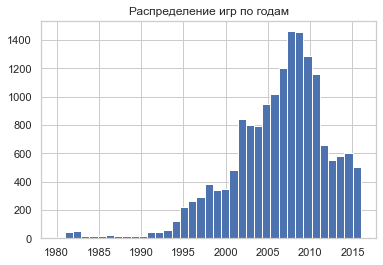

In [176]:
print(games_data['year_of_release'].value_counts())
games_data['year_of_release'].hist(bins=37)
plt.title('Распределение игр по годам')

Видим, что до 1995 года количество игр не привышает 121 в год.

#### Посмотрим, как менялись продажи по платформам. 

platform
ps2     1255.77
x360     971.42
ps3      939.65
wii      907.51
ds       806.12
ps       730.86
gba      317.85
ps4      314.14
psp      294.05
pc       259.52
3ds      259.00
xb       257.74
gb       255.46
nes      251.05
n64      218.68
snes     200.04
gc       198.93
xone     159.32
2600      96.98
wiiu      82.19
psv       54.07
sat       33.59
gen       28.35
dc        15.95
scd        1.86
ng         1.44
ws         1.42
tg16       0.16
3do        0.10
gg         0.04
pcfx       0.03
Name: sum_sales, dtype: float64

Text(0.5, 1.0, 'Распределение продаж по платформам')

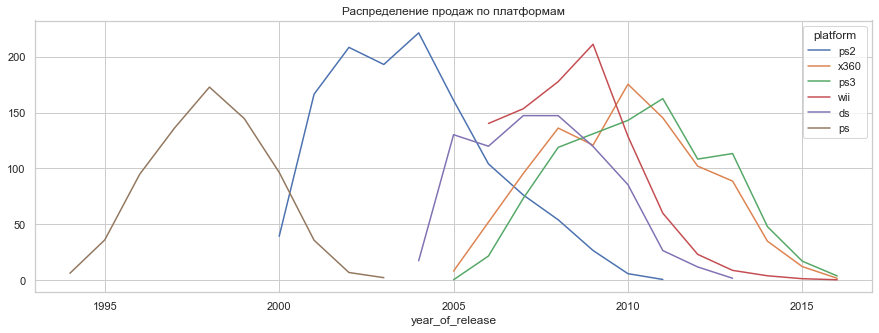

In [177]:
display(games_data.groupby('platform')['sum_sales'].sum().sort_values(ascending=False))
platform_list_top=['ps2','x360','ps3','wii','ds','ps']
platform_slice = games_data.query('platform in(@platform_list_top)')
platf = platform_slice.pivot_table(index='year_of_release',columns='platform', values = 'sum_sales', aggfunc='sum').reset_index()
platf.plot(x='year_of_release', y=platform_list_top, figsize=(15,5), grid=True, xlim=(1993,2017))
plt.title('Распределение продаж по платформам')

С 2005 года появляются новые платформы, когда как старые начинают исчезать с 2003 года 

#### Возьмем данные за соответствующий актуальный период

Text(0.5, 1.0, 'Распределение игр по актуальным годам')

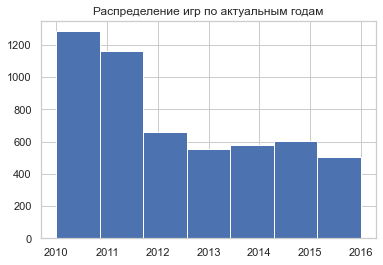

In [178]:
platform_list_year=['2010','2011','2012','2013','2014','2015','2016']
year_slice = games_data.query('year_of_release in @platform_list_year')
year_slice['year_of_release'].hist(bins=len(platform_list_year))
plt.title('Распределение игр по актуальным годам')


platform
ps3     595.11
x360    559.36
ps4     314.14
3ds     258.98
wii     225.06
xone    159.32
pc      125.40
ds      124.89
wiiu     82.19
psp      64.55
psv      54.07
ps2       6.09
Name: sum_sales, dtype: float64

platform,year_of_release,3ds,ds,pc,ps3,ps4,wii,x360,xone
0,2010,0.30,85.35,26.81,142.96,NaN,128.67,175.36,NaN
1,2011,63.20,26.33,35.16,162.44,NaN,59.79,145.23,NaN
2,2012,51.76,11.67,23.37,108.28,NaN,22.94,101.97,NaN
3,2013,57.04,1.54,13.01,113.25,25.99,8.59,88.58,18.96
4,2014,43.76,NaN,13.28,47.76,100.00,3.75,34.74,54.07


Text(0.5, 1.0, 'Распределение продаж по платформам за актуальные года')

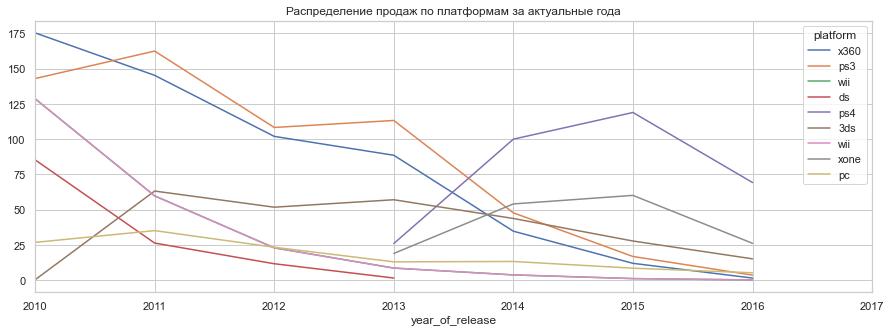

In [179]:
display(year_slice.groupby('platform')['sum_sales'].sum().sort_values(ascending=False))
platform_list_top_act=['x360','ps3','wii','ds','ps4','3ds','wii','xone','pc']
platform_slice_year = year_slice.query('platform in (@platform_list_top_act)')
platf_act = platform_slice_year.pivot_table(index='year_of_release',columns='platform', values = 'sum_sales', aggfunc='sum').reset_index()
display(platf_act.head())
platf_act.plot(x='year_of_release', y=platform_list_top_act, figsize=(15,5), grid=True, xlim=(2010,2017))
plt.title('Распределение продаж по платформам за актуальные года')

Видим, что по продажам за 2015 и 2016 года лидируют PS4 и Xone

#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

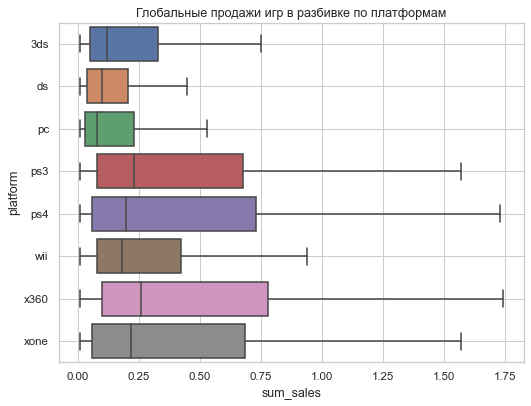

In [180]:
plt.figure(figsize=(8, 6), dpi=75)
tmp = \
platform_slice_year.groupby('platform', as_index=False).agg({'sum_sales':'median'})
sns.boxplot(y='platform', x= 'sum_sales', data=platform_slice_year, showfliers=False, order=tmp['platform'].to_list())
plt.title('Глобальные продажи игр в разбивке по платформам')
plt.grid(True)
plt.show()   

Самые большие продажи были у платформ: ps3, xone,x360, ps4

#### Влияние отзывов пользователей и критиков  на продажи внутри одной популярной платформы 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,beyblade burst,3ds,2016,role-playing,0.00,0.00,0.03,0.00,NaN,NaN,T,0.03
1,fire emblem fates,3ds,2015,role-playing,0.81,0.23,0.52,0.11,NaN,NaN,T,1.67
2,frozen: olaf's quest,3ds,2013,platform,0.27,0.27,0.00,0.05,NaN,NaN,E,0.59
3,frozen: olaf's quest,ds,2013,platform,0.21,0.26,0.00,0.04,NaN,NaN,E,0.51
4,haikyu!! cross team match!,3ds,2016,adventure,0.00,0.00,0.04,0.00,NaN,NaN,E,0.04


x360: Коэффициент корреляции продаж с оценками пользователей :  0.07153913003066209
x360: Коэффициент корреляции продаж с оценками критиков :  0.32497970629851514
ps3: Коэффициент корреляции продаж с оценками пользователей :  0.0676186134723896
ps3: Коэффициент корреляции продаж с оценками критиков :  0.36947294974372524
wii: Коэффициент корреляции продаж с оценками пользователей :  0.1620739187653803
wii: Коэффициент корреляции продаж с оценками критиков :  0.2582754083945839
ds: Коэффициент корреляции продаж с оценками пользователей :  0.3087044289908962
ds: Коэффициент корреляции продаж с оценками критиков :  0.2989571050551463
ps4: Коэффициент корреляции продаж с оценками пользователей :  -0.020862013402478414
ps4: Коэффициент корреляции продаж с оценками критиков :  0.3908899363117357
3ds: Коэффициент корреляции продаж с оценками пользователей :  0.2332978675610902
3ds: Коэффициент корреляции продаж с оценками критиков :  0.32162893610229587
wii: Коэффициент корреляции продаж с оц

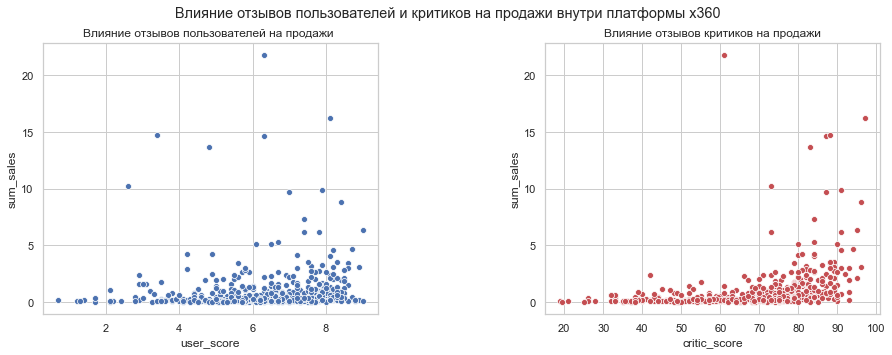

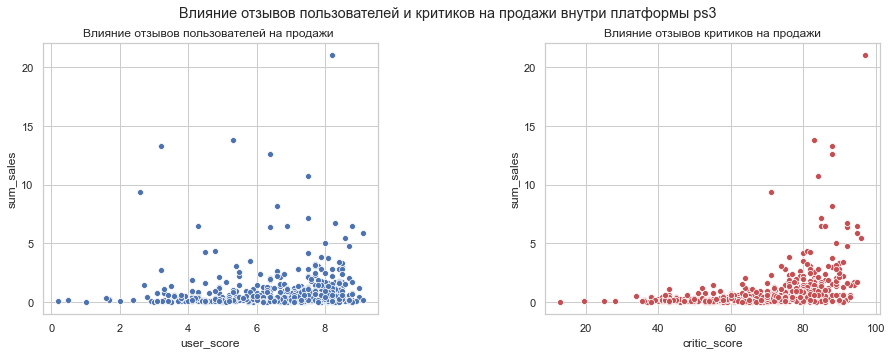

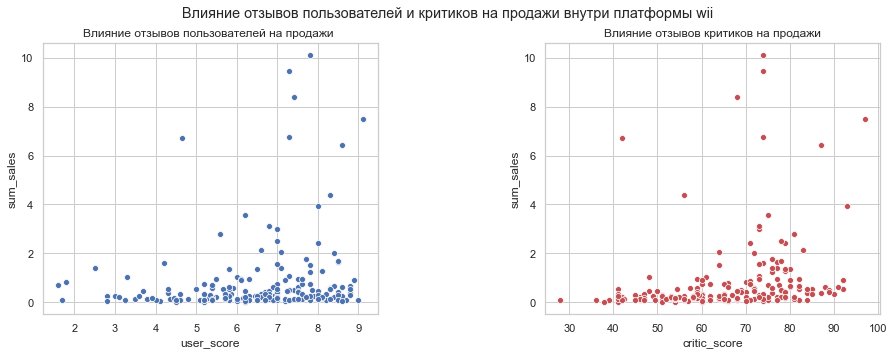

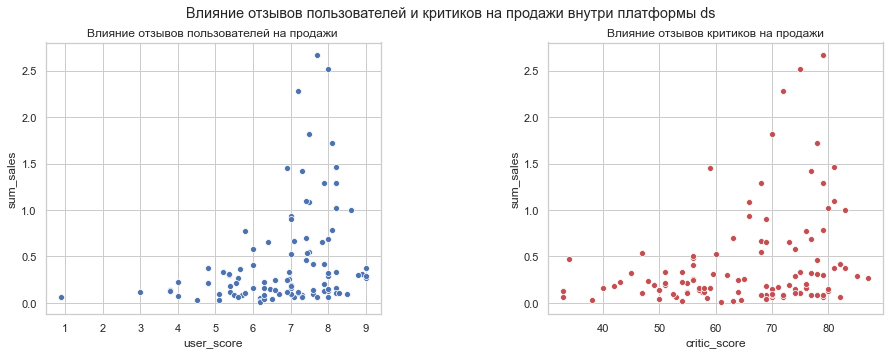

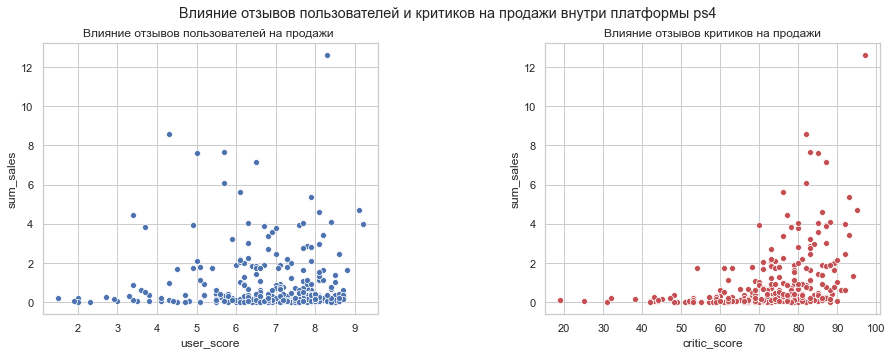

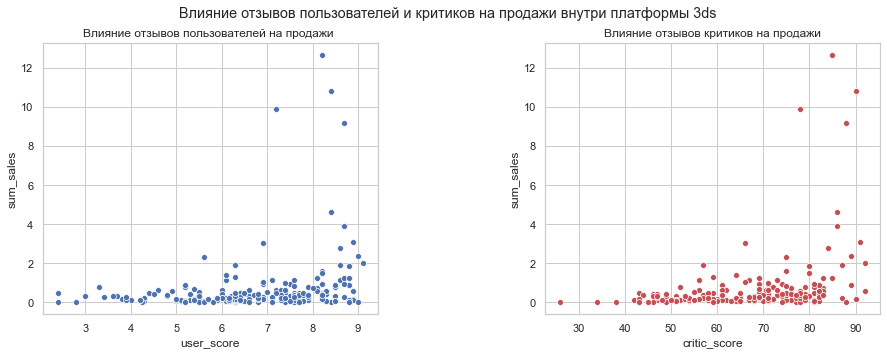

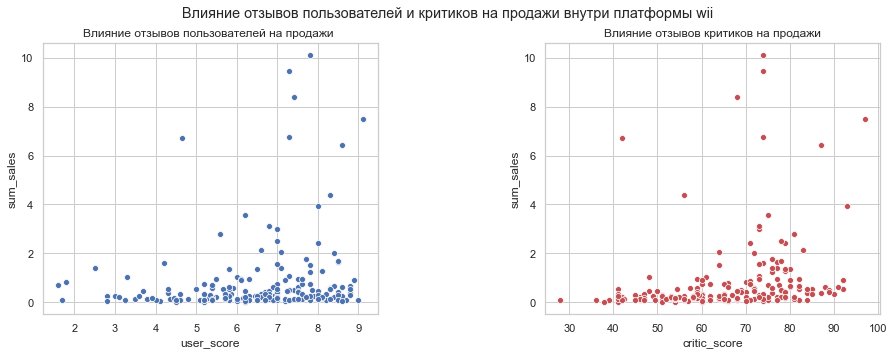

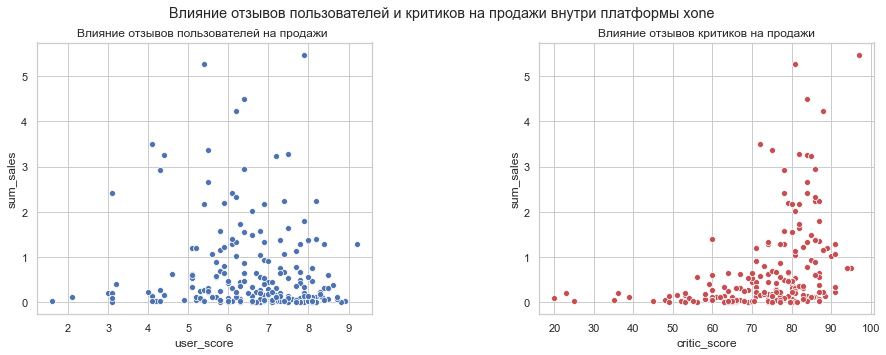

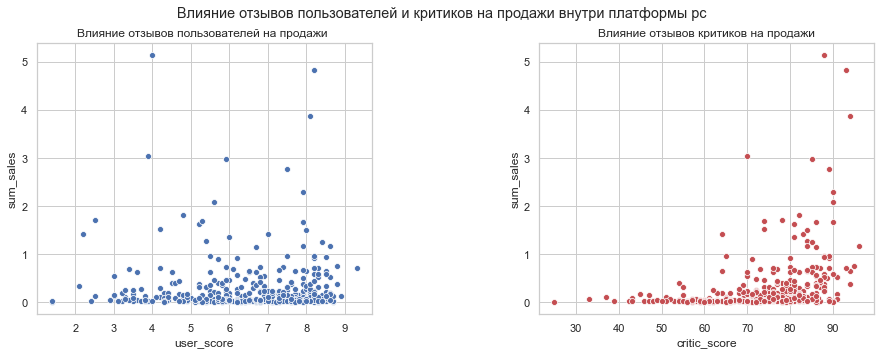

In [181]:
# Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами
display(platform_slice_year.head())
sns.set(style="whitegrid")

# Рассмотрим 
def scatter_plot(df, platform_name):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (15,5))
    fig.subplots_adjust(wspace=0.5, hspace = 0.5)
    fig.suptitle('Влияние отзывов пользователей и критиков на продажи внутри платформы ' + platform_name)
    sns.scatterplot(x="user_score", y="sum_sales", 
                    data=df.loc[df['platform']== platform_name], 
                    palette="muted", ax=ax[0])
    ax[0].set_title('Влияние отзывов пользователей на продажи ')
    sns.scatterplot(x="critic_score", y="sum_sales", 
                    data=df.loc[df['platform']== platform_name],ax=ax[1], 
                    palette="muted",color='r')
    ax[1].set_title('Влияние отзывов критиков на продажи')
    
    
platform_top_act=['x360','ps3','wii','ds','ps4','3ds','wii','xone','pc']   
for platform_name in platform_top_act:
    scatter_plot(platform_slice_year, platform_name)
    print(platform_name+': Коэффициент корреляции продаж с оценками пользователей : ',platform_slice_year.loc[platform_slice_year['platform']== platform_name, 'user_score'].
          corr(platform_slice_year.loc[platform_slice_year['platform']== platform_name, 'sum_sales']))
    print(platform_name+': Коэффициент корреляции продаж с оценками критиков : ',platform_slice_year.loc[platform_slice_year['platform']== platform_name, 'critic_score'].
          corr(platform_slice_year.loc[platform_slice_year['platform']== platform_name, 'sum_sales']))




####  Вывод

Мнения критиков небольшим образом сказывается на продажи игр внутри платформ. Небольшое влияние критиков наблюдается на всех рассматриваемых платформах из выборки (Корреляция приближается 0,3)

На основе имеющихся данных нельзя сказать, что есть взаимосвязь между оценками пользователей и и продажами. 

#### Рассмотрим общее распределение игр по жанрам

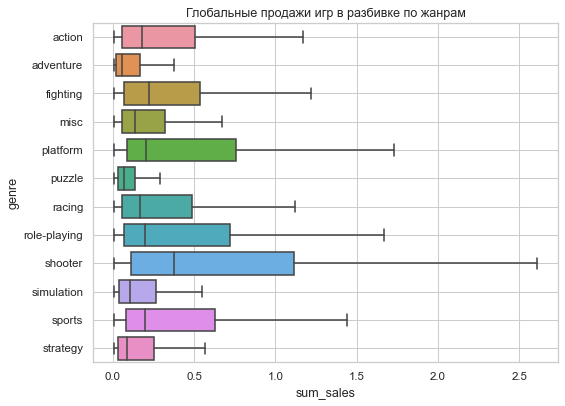

In [182]:
plt.figure(figsize=(8, 6), dpi=75)
tmp = \
platform_slice_year.groupby('genre', as_index=False).agg({'sum_sales':'median'})
sns.boxplot(y='genre', x= 'sum_sales', data=platform_slice_year, showfliers=False, order=tmp['genre'].to_list())
plt.title('Глобальные продажи игр в разбивке по жанрам')
plt.grid(True)
plt.show()  

Шутеры, по сравнению с другими жанрами игр, приносят разработчикам больше денег. Самые низкие продажи у : puzzle, adventure  

### Вывод
На данном этапе был проведен исследовательский анализ данных. Рассмотрели количество выпускаемых игр в разные года и выбрали для себя актуальный период(с 2010г.). На данном периоде рассмотрели суммарные продажи для следующих платформ:  x360, ps3, wii, ds, ps4, 3ds, wii, xone, pc. Выявили высокие показатели продаж  у платформ: ps3, xone, x360, ps4. 

Рассмотрели глоабльные продажи в разбивке по жанрам. Максимальная прибыль с продаж у шутеров. 

Также были построены диаграммы рассеяния и посчитана корреляция между отзывами критиков/пользователей и продажами. Была выявлена несущественная корреляция между оценками критиков и продажами.

## <a id="step4">Шаг 4. Составьте портрет пользователя каждого региона </a>

#### Самые популярные платформы (топ-5). 

Напишем функцию, которая будет создавать датафрейм по заданному столбцу

In [183]:
def top_5(df, column):
    user_reg = ['na_sales','eu_sales', 'jp_sales']
    top_col = pd.DataFrame(columns = ['user_reg', column, 'sales'])
    for user in user_reg:
        for i in range(0,5):
            col = df.groupby(column)[user].sum().sort_values(ascending=False).index[i]
            sale = df.groupby(column)[user].sum().sort_values(ascending=False)[i]
            top_col.loc[len(top_col)] = [user, col, sale]
            i+=1
    g = sns.catplot(x=column, y="sales", hue="user_reg", data=top_col, height=6, kind="bar", palette="muted")
    g.despine(left=True)
    g.set(title='Распределение Топ 5 по регионам')
    return top_col

 Найдем топ 5 популярных платформ для каждого региона

,user_reg,platform,sales
0,na_sales,x360,602.47
1,na_sales,ps2,583.84
2,na_sales,wii,496.90
3,na_sales,ps3,393.49
4,na_sales,ds,382.40
5,eu_sales,ps2,339.29
6,eu_sales,ps3,330.29
7,eu_sales,x360,270.76
8,eu_sales,wii,262.21
9,eu_sales,ps,213.61


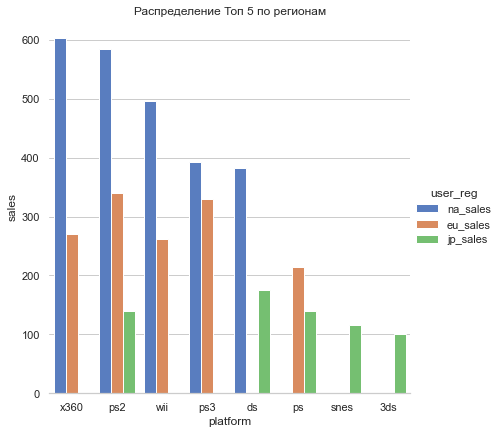

In [184]:
platform_top_5 = top_5(games_data, 'platform')
display(platform_top_5)

На одних и тех же платформах макимальныю прибыль разработчики игр получают в Северной Америке. По распределению видно, что в Японии отдают предпочтение в пользу платфоhм собственного производства. 

#### Самые популярные жанры (топ-5)

,user_reg,genre,sales
0,na_sales,action,879.01
1,na_sales,sports,684.43
2,na_sales,shooter,592.24
3,na_sales,platform,445.50
4,na_sales,misc,407.27
5,eu_sales,action,519.13
6,eu_sales,sports,376.79
7,eu_sales,shooter,317.34
8,eu_sales,racing,236.51
9,eu_sales,misc,212.74


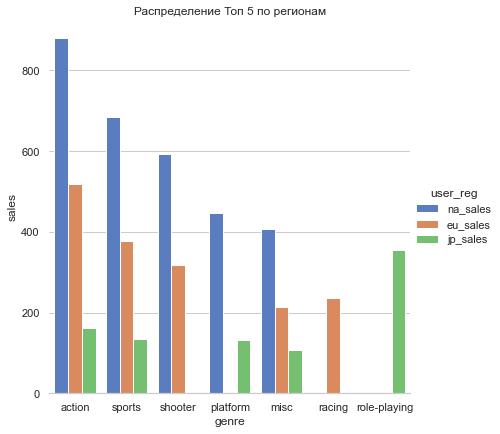

In [185]:
genre_top_5 = top_5(games_data, 'genre')
display(genre_top_5)

Если рассмататривать жанры, то Северная Америка также лидирует по числу продаж (в два раза больше). Самым прдаваем жанром в Европе и Северной Америки стал: action, в то время как в Японии: role-playing 

#### Влияние  рейтинга ESRB на продажи в отдельном регионе

,user_reg,rating,sales
0,na_sales,E,1999.39
1,na_sales,T,1172.82
2,na_sales,M,872.25
3,na_sales,E10+,353.32
4,na_sales,EC,1.53
5,eu_sales,E,1070.69
6,eu_sales,T,635.42
7,eu_sales,M,528.71
8,eu_sales,E10+,188.52
9,eu_sales,AO,0.61


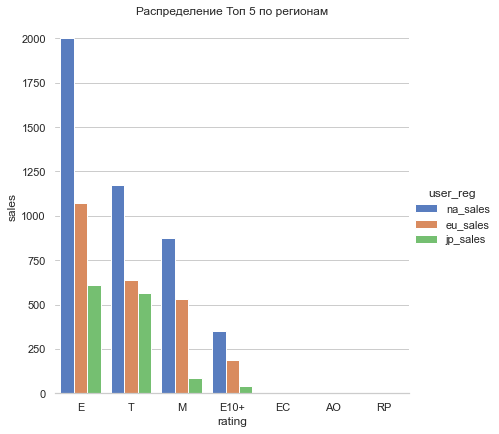

In [186]:
esrb = top_5(games_data, 'rating')
display(esrb)

Рейтинг ESRB влияет на продажи в Северной Америке и Европе пропорционально одинаково. В Японии продажи для рейтинга 'E' (Everyone) приближены к рейтингу 'T'(Teen)

## <a id="step5">Шаг 5. Проверьте гипотезы </a>

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые



Нулевая гипотеза (Н₀): Средний пользовательский рейтинг генеральной совокупности платформы Xbox One равен среднему пользовательскому рейтингу генеральной совокупности платформы PC

Альтернативная гипотеза (H₁):  Средний пользовательский рейтинг генеральной совокупности платформы Xbox One не равен среднему пользовательскому рейтингу генеральной совокупности платформы PC


In [187]:
#проверим гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам
results_platform = st.ttest_ind(
    games_data.loc[games_data['platform'] == 'ps', 'user_score'], 
    games_data.loc[games_data['platform'] == 'xone', 'user_score'],nan_policy="omit")

alpha = .05 # критический уровень статистической значимости
print('p-значение: ', results_platform.pvalue)
if (results_platform.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.2963754331247821e-16
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу. Средний пользовательский рейтинг генеральных совокупностей платформ Xbox One и PC различается.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза (Н₀): Средний пользовательский рейтинг генеральной совокупности жанра Action равен среднему пользовательскому рейтингу генеральной совокупности жанра Sports

Альтернативная гипотеза (H₁):  Средний пользовательский рейтинг генеральной совокупности жанра Action не равен среднему пользовательскому рейтингу генеральной совокупности жанра Sports


In [188]:
results_genre = st.ttest_ind(
    games_data.loc[games_data['genre'] == 'action', 'user_score'], 
    games_data.loc[games_data['genre'] == 'sports', 'user_score'],nan_policy="omit")

alpha = .05 # критический уровень статистической значимости
print('p-значение: ', results_genre.pvalue)
if (results_genre.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.06258835857707146
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value = 0.06. Это слишком маленькая вероятность, но с учетом выбранного нами порогового значения мы не можем сделать вывод о различии между средними пользовательских рейтингов жанров Action и Sports

## <a id="step6">Шаг 6. Общий вывод </a>

В данной работе мы выявляли закономерности успешности игры. 

Данные по продажам в работе за период с 1980 г. по 2016 г.

Мы выявили, что за последние годы шутеры намного лучше продаются, а мнение критиков хоть и в малой степени, но влияет на продажи игр. По покупательной способности, лучше отдать предпочтение Северной Америке и Европе, а также соориентировать свое внимание на консоли. К концу выбранного периода большинство продаж приходилось на PS4 и Xbox One.

Также были проверены две гипотезы.

